In [4]:
import tensorflow as tf
import keras
lens_color_model = keras.models.load_model("D:\PythonFiles\eyewear\codes\models\saved models\lens_color_model.h5")
frame_color_model = keras.models.load_model("D:\\PythonFiles\\eyewear\\codes\\models\\saved models\\frame_color_model.h5")
frame_shape_model = keras.models.load_model("D:\\PythonFiles\\eyewear\\codes\\models\\saved models\\frame_shape_model.h5")
frame_type_model = keras.models.load_model("D:\\PythonFiles\\eyewear\\codes\\models\\saved models\\frame_type_model.h5")
pattern_model = keras.models.load_model("D:\PythonFiles\eyewear\codes\models\saved models\pattern_model.h5")
sub_sub_category_L3_model = keras.models.load_model("D:\PythonFiles\eyewear\codes\models\saved models\sub_sub_category_L3_model.h5")
sub_category_L2_model = keras.models.load_model("D:\PythonFiles\eyewear\codes\models\saved models\sub_category_L2_model.h5")
category_L1_model = keras.models.load_model("D:\PythonFiles\eyewear\codes\models\saved models\category_L1_model.h5")


In [5]:
sub_category_list = ['Eyeglass Frames', 'Eyewear', 'Sunglasses']
lens_color_list = ['Beige', 'Black', 'Blue', 'Brown', 'Clear', 'Gold', 'Green', 'Grey', 'Lavender', 'Maroon', 'Metallic', 'Multi-Color', 'Navy Blue', 'Olive', 'Orange', 'Peach', 'Pink', 'Purple', 'Red', 'Rose Gold', 'Silver', 'Turquoise', 'Violet', 'White', 'Yellow']
sub_sub_category_list = ['Clear Eyeglasses', 'Eyeglass Frames', 'Eyewear Accessories', 'Sunglasses']
category_list = ['Accessories']
frame_color_list = ['Beige', 'Black', 'Blue', 'Bronze', 'Brown', 'Burgundy', 'Clear', 'Cream', 'Gold', 'Green', 'Grey', 'Maroon', 'Metallic', 'Multi-Color', 'Navy Blue', 'Nude', 'Off White', 'Olive', 'Orange', 'Peach', 'Pink', 'Purple', 'Red', 'Rose Gold', 'Silver', 'Transparent', 'Turquoise', 'Violet', 'White', 'Wine', 'Yellow']
frame_shape_list = ['Aviator', 'Butterfly', 'Cat Eye', 'Clubmaster', 'Geometrical', 'Hexagon', 'Irregular', 'Navigator', 'Oval', 'Oversized', 'Phantos', 'Pillow', 'Pilot', 'Rectangle', 'Retro', 'Round', 'Shield', 'Sports', 'Square', 'Wayfarer', 'Wrap']
frame_type_list = ['Full Rim', 'Half Rim', 'Rimless']
pattern_list = ['Animal Print', 'Printed', 'Solid-plain', 'Tortoise']


In [33]:
IMAGE_PATH = "D:\\PythonFiles\\eyewear\\samples\\test images\\26_8910eda5-1e1a-4a4b-9ef7-764d6584781c_900x.jpg"

In [34]:
import numpy as np
import cv2
from keras.utils import np_utils

img_size = 255
data = []


img = cv2.imread(IMAGE_PATH)
try:
    resized = cv2.resize(img, (img_size, img_size))
    # resizing the image  into 256 x 256, since we need a fixed common size for all the images in the dataset
    data.append(resized)
#     label.append(label_dict[category])
    # appending the image and the label(categorized) into the list (dataset)
except Exception as e:
    print('Exception:', e)
    # if any exception rasied, the exception will be printed here. And pass to the next image


data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))

<function matplotlib.pyplot.show(close=None, block=None)>

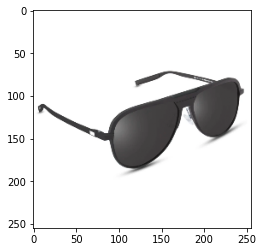

In [35]:
import matplotlib.pyplot as plt
plt.imshow(np.squeeze(data))
plt.show

In [36]:
sub_sub_category_L3 = sub_sub_category_L3_model.predict(data)
sub_category_L2 = sub_category_L2_model.predict(data)
lens_color = lens_color_model.predict(data)
category_L1 = category_L1_model.predict(data)
frame_color = frame_color_model.predict(data)
frame_shape = frame_shape_model.predict(data)
frame_type = frame_type_model.predict(data)
pattern = pattern_model.predict(data)


In [37]:
lens_color = lens_color_list[np.argmax(lens_color)]
sub_category_L2 = sub_category_list[np.argmax(sub_category_L2)]
sub_sub_category_L3 = sub_sub_category_list[np.argmax(sub_sub_category_L3)]
category_L1 = category_list[np.argmax(category_L1)]
frame_color =  frame_color_list[np.argmax(frame_color)]
frame_shape =  frame_shape_list[np.argmax(frame_shape)]
frame_type =  frame_type_list[np.argmax(frame_type)]
pattern = pattern_list[np.argmax(pattern)]

In [38]:
print('lens color: ',lens_color)
print('farme color: ',frame_color)
print('frame shape: ',frame_shape)
print('frame type: ', frame_type)
print('sub category L2: ',sub_category_L2)
print('sub-sub category L3: ',sub_sub_category_L3)
print('category L1: ',category_L1)
print('pattern: ',pattern)


lens color:  Multi-Color
farme color:  Black
frame shape:  Cat Eye
frame type:  Full Rim
sub category L2:  Eyewear
sub-sub category L3:  Sunglasses
category L1:  Accessories
pattern:  Solid-plain


In [39]:
statement = f'{lens_color} {frame_shape} {pattern} {sub_category_L2}'
print(statement)

Multi-Color Cat Eye Solid-plain Eyewear


In [42]:
import csv
import os

# Define the CSV file name and headers
csv_file = 'predictions.csv'
headers = [ 'category_L1', 'sub_category_L2', 'sub_sub_category_L3', 'lens_color', 'frame_color', 'frame_shape', 'frame_type', 'pattern', 'filename']

# Check if the CSV file exists
if not os.path.isfile(csv_file):
    # If the CSV file doesn't exist, create it and write the headers
    with open(csv_file, 'w', newline='') as f:
        writer = csv.writer(f)
        writer.writerow(headers)

# Append the predicted values to the CSV file
with open(csv_file, 'a', newline='') as f:
    writer = csv.writer(f)

    category_L1 = category_L1
    sub_category_L2 = sub_category_L2
    sub_sub_category_L3 = sub_sub_category_L3
    lens_color = lens_color
    frame_color = frame_color
    frame_shape = frame_shape
    frame_type = frame_type  
    pattern = pattern
    filename = IMAGE_PATH

    row = [ category_L1, sub_category_L2, sub_sub_category_L3, lens_color, frame_color, frame_shape, frame_type, pattern, filename]
    writer.writerow(row)
